<a href="https://colab.research.google.com/github/jrmaza/chemoinformatics/blob/main/Inform%C3%A1tica_Qu%C3%ADmica_Predicci%C3%B3n_de_Solubilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de la solubilidad en medio acuoso mediante el cálculo de propiedades moleculares con RDKit**

Delaney2004, diseñó una ecuación para la estimación de la solubilidad en agua $log(S_w)$
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://pubs.acs.org/doi/10.1021/ci034243x"><img src="https://github.com/jrmaza/media/blob/main/ESOL_paper.png?raw=true" />Run in Google Colab</a>
  </td>
</table>

Mediante la ecuación paramétrica

\begin{align}
log(S_w) = 0.16 - 0.63logP - 0.0062MWT + 0.066RB - 0.74AP 
\end{align}

Donde $logP$ es la constante de partición octanol/agua, $MWT$ es el peso molecular total, $RB$ es el número de enlaces rotables que tiene la molécula y $AP$ es la proporción de átomos aromáticos con respecto al total de átomos que tiene la moléecula

Para llevar a cabo la comprobación de esta ecuación, debemos utilizar la librería ```RDKit``` disponible en ```python```, a continuación ejecute la siguiente celda (hacer click en el símbolo <img src="https://github.com/jrmaza/media/blob/main/play.png?raw=true" width="40" height="40" /> que aparecerá cuando sitúa el mouse sobre la frase en azul: Mostrar código) 





In [48]:
#@title Instalación de ```RDKit```
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
#@title Importamos los métodos para el cálculo de propiedades
import numpy as np #importamos la librería numérica numpy
import rdkit #import all RDKit
from rdkit import Chem # importamos el módulo Chem (chemistry) de RDKit
from rdkit.Chem import Descriptors # importamos el módulo Descriptors para el cálculo de descriptores moleculares
from rdkit.Chem import Draw #importamos el módulo Draw visualizar moléculas en 2D
from rdkit.Chem.Draw import IPythonConsole #permitimos a Draw insertar imágenes en el Colab
from rdkit.Chem import AllChem

Ahora estamos listos para probar RDKit en google Colab

In [50]:
#@title Creamos una molécula a partir del SMILES
caffeine = Chem.MolFromSmiles('Cn1cnc2c1c(=O)n(c(=O)n2C)C')

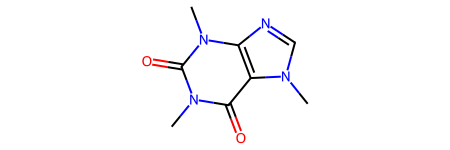

In [51]:
#@title Visualizamos la molécula en screen
caffeine

Ahora calcularemos las propiedades moleculares utilizando modos y funciones:

In [52]:
#@title 1. Constante de partición Octanol/Agua ```logP```
clogp = Descriptors.MolLogP(caffeine)
clogp

-1.0293

In [53]:
#@title 2. Peso Molecular Total ```MWT```
mwt = Descriptors.MolWt(caffeine)
mwt

194.194

In [54]:
#@title 3. Enlaces Rotables ```RB```
rb = Descriptors.NumRotatableBonds(caffeine)
rb

0

In [55]:
#@title Función para el cómputo de la proporción aromática
def ProporcionAromatica(m):
  atomos_aromaticos = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in atomos_aromaticos:
    if i==True:
      aa_count.append(1)
  TotAtomAromatic = sum(aa_count)
  TotAtomMol = Descriptors.HeavyAtomCount(m)
  PropArom = TotAtomAromatic/TotAtomMol
  return PropArom

def PropNonCAtomos(m):
  pattern = Chem.MolFromSmarts("[C,c]")
  CAtoms = m.GetSubstructMatches(pattern)
  TotAtomMol = Descriptors.HeavyAtomCount(m)
  NonCAtoms = TotAtomMol - len(CAtoms)
  PropNCAt = NonCAtoms/TotAtomMol
  return PropNCAt

In [56]:
#@title 4. Proporción Aromática ```AP```
ap = ProporcionAromatica(caffeine)
ap

0.6428571428571429

Finalmente estamos listos para estimar la solubilidad de la cafeína con la ecuación de Delaney

In [61]:
#@title Estimación de $log(S_w)$ por el método de Delaney
log_sol_calc = 0.16 - 0.63*clogp - 0.0062*mwt + 0.066*rb - 0.74*ap
print('Solubilidad estimada: ', log_sol_calc)
print('Este es el valor a reportar en el archivo de Google Worsheet')
log_sol_calc

Solubilidad estimada:  -0.8712580857142854
Este es el valor a reportar en el archivo de Google Worsheet


-0.8712580857142854

In [ ]:
#@title https://docs.google.com/spreadsheets/d/1lvzF0wDQHMFAOIMQ0mI2SNOuwjaEPx056_6tAyiC1mI/edit?usp=sharing


Según [PubChem](https://pubchem.ncbi.nlm.nih.gov/compound/2519#section=Solubility) la solublidad de la cafeína de manera experimental arroja un valor de 2.17g/100mL, por lo que podemos calcular $log(S_w)^{experimental}$

In [58]:
log_sol_exp = -np.log(2.17)
print('Solubilidad experimental: ', log_sol_exp)

Solubilidad experimental:  -0.7747271675523681


In [59]:
#@title Porcentaje de Error
err = 100*np.abs(log_sol_exp - log_sol_calc)/np.abs(log_sol_exp)
print('Porcentaje de error: ', err,'%')

Porcentaje de error:  12.459988781197893 %
